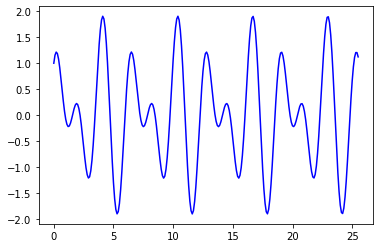

In [7]:
import math
import matplotlib as mpl 
import matplotlib.pyplot as plt 

x = [0.1*i for i in range(256)]
y = []

n = len(x)

for i in range(n):
    y.append(math.cos(3*x[i]) + math.sin(2*x[i]))

plt.plot(x, y, color='blue') 

Text(0.5, 1.0, 'Выходной сигнал')

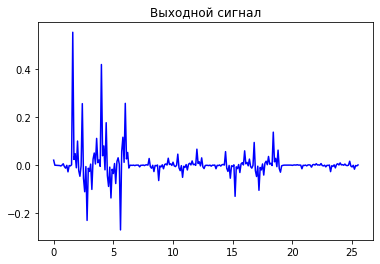

In [14]:
#ПДПУ

def bit(num, pos):
    return (num & (1 << pos)) >> pos

def r(k, t):
    value = math.sin(2 ** k * math.pi * t)
    if value > 0:
        return 1
    elif value == 0:
        return 0
    else:
        return -1

def pdpw(y, n):
    c = []
    m = len(y)
    for h in range(m):
        c_h = 0
        for x in range(m):
            step = 0
            for i in range(m):
                step += bit(h, i)*bit(x, i)
            c_h += y[x] * (-1) ** step
        c.append(c_h / n)
    return c

plt.plot(x, pdpw(y, n), color='blue') 
plt.title("Выходной сигнал")

Text(0.5, 1.0, 'Амплитудный спектр сигнала')

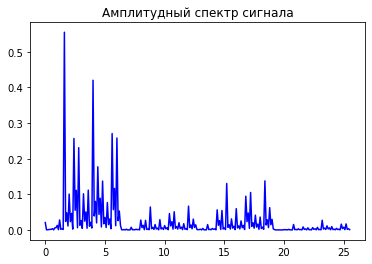

In [15]:
c = pdpw(y, n)
c_abs = []
for i in range(n):
    c_abs.append(abs(c[i]))
    
plt.plot(x, c_abs, color='blue')  
plt.title("Амплитудный спектр сигнала")

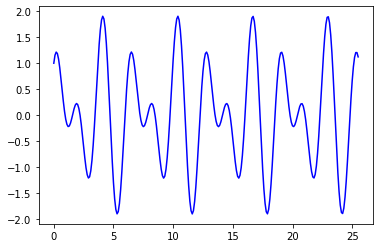

In [18]:
#ОДПУ

plt.plot(x, pdpw(c, 1), color='blue') 

Text(0.5, 1.0, 'Выходной сигнал')

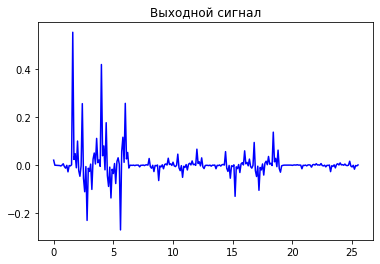

In [6]:
#ПБПУ

def bpw(a, n):
    m = len(a)
    if m == 1:
        return a
    else:
        y = [0 for i in range(m)]
        for i in range(m // 2):
            y[i] = a[i] + a[i+(m//2)]
            y[i+(m//2)] = a[i] - a[i+(m//2)]
        b_1 = [y[i] for i in range(m//2)]
        b_2 = [y[i] for i in range(m//2, m)]
        b_1 = bpw(b_1, n)
        b_2 = bpw(b_2, n)
        for i in range(m):
            if i < m//2:
                y[i] = b_1[i]
            else:
                y[i] = b_2[i-m//2]   
        if m == n:
            for i in range(m):
                y[i] /= n
        
        return y
    
plt.plot(x, bpw(y, len(y)), color='blue') 
plt.title("Выходной сигнал")

Text(0.5, 1.0, 'Амплитудный спектр сигнала')

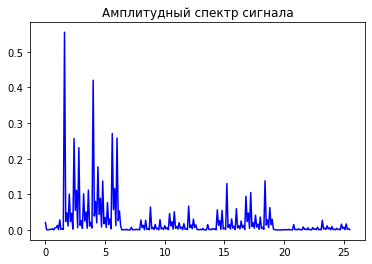

In [9]:
y2_abs = []
y2_bpw = bpw(y, len(y))
for i in range(len(y)):
    y2_abs.append(abs(y2_bpw[i]))
    
plt.plot(x, y2_abs, color='blue') 
plt.title("Амплитудный спектр сигнала")

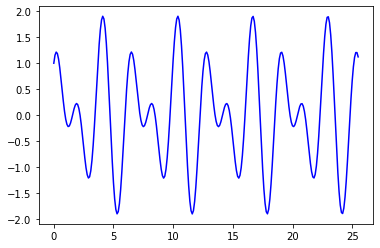

In [12]:
#ОБПУ

def obpw(a, n):    
    y = bpw(a, n)
    for i in range(len(y)):
        y[i] *= n
    return y
    
plt.plot(x, obpw(y2_bpw, len(y2_bpw)), color='blue') 